# Data Understanding

## Context
Database Northwind ini menggambarkan database milik suatu perusahaan fiktif yang bernama Northwind Traders dimana perusahaan ini bergerak dalam bidang eksport import makanan. Dalam database ini terdapat tabel-tabel seperti layaknya dalam suatu perusahaan eksport import seperti tabel Customers, Orders, Suppliers dan lain sebagainya. 

Database Northwind yang dimiliki mempunyai 13 tabel, yaitu:
- categories : Kategori barang
- customercustomerdemo & customerdemographics : Karakteristik customer
- customers : Data customer
- employees : Data pekerja / karyawan
- employeeterritories : Wilayah pekerja / karyawan
- orders and orderdetails : Transaksi Pesanan Penjualan
- products : Produk yang dijual
- region : Region
- shippers : Rincian Pengiriman
- suppliers : Pemasok produk
- territories : Wilayah

# Database

### Import Library

In [109]:
import pandas as pd
import numpy as np
import mysql.connector as sqlcon
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [110]:
mydb = sqlcon.connect(
    host = 'localhost',
    user = 'root',
    passwd = 'adhi1998',
    database = 'northwind'
)

In [111]:
curs = mydb.cursor()

def sql_table (query) :
    curs.execute (query)
    result = curs.fetchall()
    tabel1 = pd.DataFrame(result, columns=curs.column_names)
    return tabel1

## Data Detail Customer dan Products

In [112]:
# Query1
tabel1 = sql_table (
    '''
select c.CustomerID, c.CompanyName, c.Country, year(o.requireddate) OrderYear,
    p.ProductName Product,  ca.CategoryName Category, round(p.UnitPrice,2) InitialPrice, 
    round(od.UnitPrice,2) BidPrice, od.Quantity, p.Unitsinstock, p.Unitsonorder, od.Discount, 
    round((p.unitPrice - od.UnitPrice),2) as DiffPrice, p.Reorderlevel, p.Discontinued
from categories ca
left join products p on ca.CategoryID = p.CategoryID
left join orderdetails od on p.productID = od.productID
left join orders o on od.orderID = o.orderid
left join customers c on o.customerid = c.customerid;
    '''
)

Keterangan Kolom pada Tabel :
- CustomerID: Kode pelanggan
- CompanyName : Nama Perusahaan Pelanggan
- Country : Asal Negara
- OrderYear : Kode Pemesanan
- Product : Nama Produk
- Category : Kategori Produk
- InitialPrice : Harga Awal Produk
- BidPrice : Harga Setelah Penawaran
- Quantity : Kuantitas Produk
- Unitsinstock : Stok Produk
- Unitsonorder : Produk Pesanan
- Discount : Diskon Harga
- DiffPrice : Selisih Harga
- Reorderlevel : Tingkat Reorder
- Discontinued : Status Pemberhentian

In [113]:
tabel1.head()

,CustomerID,CompanyName,Country,OrderYear,Product,Category,InitialPrice,BidPrice,Quantity,Unitsinstock,Unitsonorder,Discount,DiffPrice,Reorderlevel,Discontinued
0,QUICK,QUICK-Stop,Germany,1996,Chai,Beverages,18.00,14.40,45,39,0,0.0,3.60,10,0
1,RATTC,Rattlesnake Canyon Grocery,USA,1996,Chai,Beverages,18.00,14.40,18,39,0,0.0,3.60,10,0
2,LONEP,Lonesome Pine Restaurant,USA,1996,Chai,Beverages,18.00,14.40,20,39,0,0.0,3.60,10,0
3,WANDK,Die Wandernde Kuh,Germany,1996,Chai,Beverages,18.00,14.40,15,39,0,0.0,3.60,10,0
4,PERIC,Pericles Comidas clsicas,Mexico,1996,Chai,Beverages,18.00,14.40,12,39,0,0.0,3.60,10,0


## Data Kategori Produk yang memiliki Jumlah DiffPrice Terbesar

In [173]:
# Query2
tabel2 = sql_table (
    '''
select ca.CategoryName Category, sum(p.unitPrice - od.UnitPrice) as DiffPrice
from categories ca
left join products p on ca.CategoryID = p.CategoryID
left join orderdetails od on p.productID = od.productID
group by Category;
    '''
)

In [174]:
tabel2

,Category,DiffPrice
0,Beverages,787.3500
1,Condiments,281.9000
2,Confections,523.8100
3,Dairy Products,697.1000
4,Grains/Cereals,278.7000
5,Meat/Poultry,516.1500
6,Produce,296.8500
7,Seafood,346.6500


# Data Manipulation

## Data Anomalies

In [114]:
tabel1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2155 entries, 0 to 2154
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   CustomerID    2155 non-null   object 
 1   CompanyName   2155 non-null   object 
 2   Country       2155 non-null   object 
 3   OrderYear     2155 non-null   int64  
 4   Product       2155 non-null   object 
 5   Category      2155 non-null   object 
 6   InitialPrice  2155 non-null   object 
 7   BidPrice      2155 non-null   object 
 8   Quantity      2155 non-null   int64  
 9   Unitsinstock  2155 non-null   int64  
 10  Unitsonorder  2155 non-null   int64  
 11  Discount      2155 non-null   float64
 12  DiffPrice     2155 non-null   object 
 13  Reorderlevel  2155 non-null   int64  
 14  Discontinued  2155 non-null   int64  
dtypes: float64(1), int64(6), object(8)
memory usage: 252.7+ KB


### Melihat data sekilas dari General Info
Berdasarkan general info pada tabel terlihat memiliki 2155 baris dan 18 kolom, dengan index 0 sampai 2154. Setiap kolomnya memiliki data type seperti object, datetime, dan integer. Pada juga informasi jumlah Non-Null, setiap kolom tidak terdapat missing value yang ada pada tabel.

## Check Missing Value

In [115]:
tabel1.isnull().sum()

CustomerID      0
CompanyName     0
Country         0
OrderYear       0
Product         0
Category        0
InitialPrice    0
BidPrice        0
Quantity        0
Unitsinstock    0
Unitsonorder    0
Discount        0
DiffPrice       0
Reorderlevel    0
Discontinued    0
dtype: int64

## Mengubah Tipe Data yang Salah

In [116]:
tabel1['InitialPrice'] = pd.to_numeric(tabel1['InitialPrice'])
tabel1['BidPrice'] = pd.to_numeric(tabel1['BidPrice'])
tabel1['DiffPrice'] = pd.to_numeric(tabel1['DiffPrice'])

In [117]:
# Recheck general info
tabel1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2155 entries, 0 to 2154
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   CustomerID    2155 non-null   object 
 1   CompanyName   2155 non-null   object 
 2   Country       2155 non-null   object 
 3   OrderYear     2155 non-null   int64  
 4   Product       2155 non-null   object 
 5   Category      2155 non-null   object 
 6   InitialPrice  2155 non-null   float64
 7   BidPrice      2155 non-null   float64
 8   Quantity      2155 non-null   int64  
 9   Unitsinstock  2155 non-null   int64  
 10  Unitsonorder  2155 non-null   int64  
 11  Discount      2155 non-null   float64
 12  DiffPrice     2155 non-null   float64
 13  Reorderlevel  2155 non-null   int64  
 14  Discontinued  2155 non-null   int64  
dtypes: float64(4), int64(6), object(5)
memory usage: 252.7+ KB


## Menambahkan dan Menghapus Kolom

Pada kolom diskon semua mempunyai nilai 0 setiap produknya, maka tidak berpengaruh pada harga. Sehingga kolom diskon akan dihapus.

In [118]:
tabel1['Discount'].value_counts()

0.0    2155
Name: Discount, dtype: int64

In [119]:
tabel1.drop('Discount', inplace=True, axis=1)

Pada tabel akan menambahkan kolom TotalPrice, yang dimana kolom Quantity dikali kolom BidPrice

In [120]:
tabel1['TotalPrice'] = tabel1['Quantity'] * tabel1['BidPrice']

In [121]:
tabel1.sample(10)

,CustomerID,CompanyName,Country,OrderYear,Product,Category,InitialPrice,BidPrice,Quantity,Unitsinstock,Unitsonorder,DiffPrice,Reorderlevel,Discontinued,TotalPrice
103,MEREP,Mre Paillarde,Canada,1997,Guaran Fantstica,Beverages,4.50,4.5,25,20,0,0.00,0,1,112.5
1558,GROSR,GROSELLA-Restaurante,Venezuela,1996,Thringer Rostbratwurst,Meat/Poultry,123.79,99.0,10,0,0,24.79,0,1,990.0
236,QUICK,QUICK-Stop,Germany,1998,Chartreuse verte,Beverages,18.00,18.0,80,69,0,0.00,5,0,1440.0
78,LEHMS,Lehmanns Marktstand,Germany,1998,Chang,Beverages,19.00,19.0,20,17,40,0.00,25,0,380.0
1302,SIMOB,Simons bistro,Denmark,1997,Mozzarella di Giovanni,Dairy Products,34.80,34.8,24,14,0,0.00,0,0,835.2
179,AROUT,Around the Horn,UK,1998,Steeleye Stout,Beverages,18.00,18.0,4,20,0,0.00,15,0,72.0
999,KOENE,Kniglich Essen,Germany,1997,Queso Manchego La Pastora,Dairy Products,38.00,38.0,36,86,0,0.00,0,0,1368.0
1331,PICCO,Piccolo und mehr,Austria,1998,Gustaf's Knckebrd,Grains/Cereals,21.00,21.0,35,104,0,0.00,25,0,735.0
2108,WELLI,Wellington Importadora,Brazil,1997,Spegesild,Seafood,12.00,12.0,21,95,0,0.00,0,0,252.0
1819,HILAA,HILARION-Abastos,Venezuela,1997,Longlife Tofu,Produce,10.00,8.0,16,4,20,2.00,5,0,128.0


In [122]:
tabel1.head()

,CustomerID,CompanyName,Country,OrderYear,Product,Category,InitialPrice,BidPrice,Quantity,Unitsinstock,Unitsonorder,DiffPrice,Reorderlevel,Discontinued,TotalPrice
0,QUICK,QUICK-Stop,Germany,1996,Chai,Beverages,18.0,14.4,45,39,0,3.6,10,0,648.0
1,RATTC,Rattlesnake Canyon Grocery,USA,1996,Chai,Beverages,18.0,14.4,18,39,0,3.6,10,0,259.2
2,LONEP,Lonesome Pine Restaurant,USA,1996,Chai,Beverages,18.0,14.4,20,39,0,3.6,10,0,288.0
3,WANDK,Die Wandernde Kuh,Germany,1996,Chai,Beverages,18.0,14.4,15,39,0,3.6,10,0,216.0
4,PERIC,Pericles Comidas clsicas,Mexico,1996,Chai,Beverages,18.0,14.4,12,39,0,3.6,10,0,172.8


## Check Data Duplicate

In [123]:
# Check Data Duplicated
tabel1[tabel1.duplicated()]

,CustomerID,CompanyName,Country,OrderYear,Product,Category,InitialPrice,BidPrice,Quantity,Unitsinstock,Unitsonorder,DiffPrice,Reorderlevel,Discontinued,TotalPrice
312,SUPRD,Suprmes dlices,Belgium,1998,Outback Lager,Beverages,15.00,15.00,30,15,10,0.0,30,0,450.00
491,TORTU,Tortuga Restaurante,Mexico,1997,Gula Malacca,Condiments,19.45,19.45,21,27,0,0.0,15,0,408.45
1052,AROUT,Around the Horn,UK,1998,Gorgonzola Telino,Dairy Products,12.50,12.50,50,0,70,0.0,20,0,625.00
1374,GOURL,Gourmet Lanchonetes,Brazil,1997,Singaporean Hokkien Fried Mee,Grains/Cereals,14.00,14.00,20,26,0,0.0,0,1,280.00
1713,REGGC,Reggiani Caseifici,Italy,1998,Uncle Bob's Organic Dried Pears,Produce,30.00,30.00,20,15,0,0.0,10,0,600.00
1831,VICTE,Victuailles en stock,France,1997,Ikura,Seafood,31.00,24.80,20,31,0,6.2,0,0,496.00


## Handling Data Duplicate

Data duplicate berfungsi untuk menemukan data yang bersifat duplikat dan sebaiknya data yang duplikat bersifat dihapuskan dan disisakan data yang unique saja.

In [124]:
tabel1.drop_duplicates(inplace=True)

In [125]:
tabel1[tabel1.duplicated()]

,CustomerID,CompanyName,Country,OrderYear,Product,Category,InitialPrice,BidPrice,Quantity,Unitsinstock,Unitsonorder,DiffPrice,Reorderlevel,Discontinued,TotalPrice


In [126]:
tabel1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2149 entries, 0 to 2154
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   CustomerID    2149 non-null   object 
 1   CompanyName   2149 non-null   object 
 2   Country       2149 non-null   object 
 3   OrderYear     2149 non-null   int64  
 4   Product       2149 non-null   object 
 5   Category      2149 non-null   object 
 6   InitialPrice  2149 non-null   float64
 7   BidPrice      2149 non-null   float64
 8   Quantity      2149 non-null   int64  
 9   Unitsinstock  2149 non-null   int64  
 10  Unitsonorder  2149 non-null   int64  
 11  DiffPrice     2149 non-null   float64
 12  Reorderlevel  2149 non-null   int64  
 13  Discontinued  2149 non-null   int64  
 14  TotalPrice    2149 non-null   float64
dtypes: float64(4), int64(6), object(5)
memory usage: 268.6+ KB


## General Info Cleaned Data

In [129]:
# Check Some Info

listItem = []
for col in tabel1.columns :
    listItem.append([col, tabel1[col].dtype, len(tabel1),tabel1[col].isna().sum(), round((tabel1[col].isna().sum()/len(tabel1[col])) * 100,2),
                    tabel1[col].nunique(), list(tabel1[col].drop_duplicates().sample(1).values)])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Data Type', 'Data Count', 'Missing Value', 
    'Missing Value Percentage', 'Number of Unique', 'Unique Sample'],
                     data=listItem)

In [130]:
tabel1Desc

,Column Name,Data Type,Data Count,Missing Value,Missing Value Percentage,Number of Unique,Unique Sample
0,CustomerID,object,2149,0,0.0,89,[MORGK]
1,CompanyName,object,2149,0,0.0,89,[Frankenversand]
2,Country,object,2149,0,0.0,21,[Belgium]
3,OrderYear,int64,2149,0,0.0,3,[1997]
4,Product,object,2149,0,0.0,77,[Louisiana Fiery Hot Pepper Sauce]
5,Category,object,2149,0,0.0,8,[Meat/Poultry]
6,InitialPrice,float64,2149,0,0.0,62,[4.5]
7,BidPrice,float64,2149,0,0.0,116,[97.0]
8,Quantity,int64,2149,0,0.0,55,[49]
9,Unitsinstock,int64,2149,0,0.0,51,[85]


# Check Outlier TotalPrice

In [131]:
Q1 = tabel1.describe()['TotalPrice']['25%']
Q3 = tabel1.describe()['TotalPrice']['75%']

IQR = Q3 - Q1

LowerPrice = Q1 - (1.5 * IQR)
UpperPrice = Q3 + (1.5 * IQR)

outlier_index = tabel1[(tabel1['TotalPrice'] < LowerPrice) | (tabel1['TotalPrice'] > UpperPrice)]

In [132]:
outlier_index

,CustomerID,CompanyName,Country,OrderYear,Product,Category,InitialPrice,BidPrice,Quantity,Unitsinstock,Unitsonorder,DiffPrice,Reorderlevel,Discontinued,TotalPrice
75,SAVEA,Save-a-lot Markets,USA,1998,Chang,Beverages,19.0,19.0,100,17,40,0.0,25,0,1900.0
188,SPLIR,Split Rail Beer & Ale,USA,1996,Cte de Blaye,Beverages,263.5,210.8,20,17,0,52.7,15,0,4216.0
189,ERNSH,Ernst Handel,Austria,1996,Cte de Blaye,Beverages,263.5,210.8,20,17,0,52.7,15,0,4216.0
190,PICCO,Piccolo und mehr,Austria,1996,Cte de Blaye,Beverages,263.5,210.8,50,17,0,52.7,15,0,10540.0
191,BLONP,Blondesddsl pre et fils,France,1996,Cte de Blaye,Beverages,263.5,210.8,10,17,0,52.7,15,0,2108.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1906,QUICK,QUICK-Stop,Germany,1997,Carnarvon Tigers,Seafood,62.5,62.5,40,42,0,0.0,0,0,2500.0
1907,FOLIG,Folies gourmandes,France,1997,Carnarvon Tigers,Seafood,62.5,62.5,50,42,0,0.0,0,0,3125.0
1914,FOLIG,Folies gourmandes,France,1998,Carnarvon Tigers,Seafood,62.5,62.5,30,42,0,0.0,0,0,1875.0
1924,PICCO,Piccolo und mehr,Austria,1998,Carnarvon Tigers,Seafood,62.5,62.5,35,42,0,0.0,0,0,2187.5


In [133]:
tabel1.describe()

,OrderYear,InitialPrice,BidPrice,Quantity,Unitsinstock,Unitsonorder,DiffPrice,Reorderlevel,Discontinued,TotalPrice
count,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000
mean,1997.212657,27.969972,26.237859,23.804560,39.853886,8.059563,1.732113,11.898557,0.105631,628.943295
std,0.686331,31.649768,29.864946,19.039114,36.085018,19.728232,4.435637,10.791616,0.307436,1037.864088
min,1996.000000,2.500000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.800000
25%,1997.000000,12.500000,12.000000,10.000000,17.000000,0.000000,0.000000,0.000000,0.000000,153.600000
50%,1997.000000,19.450000,18.400000,20.000000,25.000000,0.000000,0.000000,10.000000,0.000000,360.000000
75%,1998.000000,34.000000,32.000000,30.000000,57.000000,0.000000,2.000000,20.000000,0.000000,728.000000
max,1998.000000,263.500000,263.500000,130.000000,125.000000,100.000000,52.700000,30.000000,1.000000,15810.000000


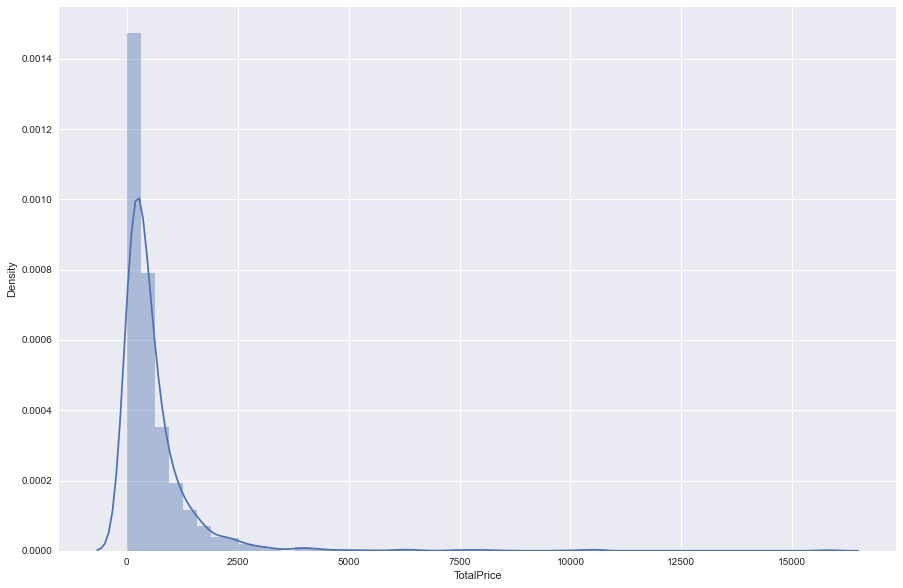

In [134]:
plt.figure(figsize = (15,10))
sns.distplot(tabel1['TotalPrice'])
plt.show()

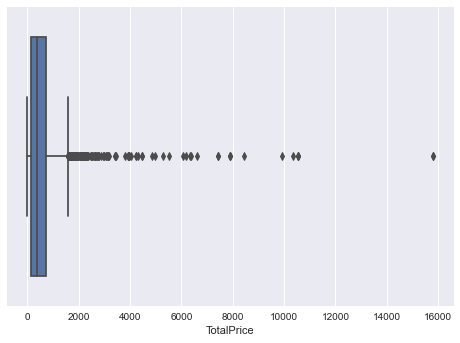

In [135]:
# Outlier Check With Function
sns.boxplot(data = tabel1, x = 'TotalPrice')
plt.xlabel('TotalPrice')
plt.show()

# Check Outlier DiffPrice

In [136]:
Q1 = tabel1.describe()['DiffPrice']['25%']
Q3 = tabel1.describe()['DiffPrice']['75%']

IQR = Q3 - Q1

LowerPrice = Q1 - (1.5 * IQR)
UpperPrice = Q3 + (1.5 * IQR)

outlier_index2 = tabel1[(tabel1['DiffPrice'] < LowerPrice) | (tabel1['DiffPrice'] > UpperPrice)]

In [137]:
outlier_index2

,CustomerID,CompanyName,Country,OrderYear,Product,Category,InitialPrice,BidPrice,Quantity,Unitsinstock,Unitsonorder,DiffPrice,Reorderlevel,Discontinued,TotalPrice
188,SPLIR,Split Rail Beer & Ale,USA,1996,Cte de Blaye,Beverages,263.50,210.8,20,17,0,52.70,15,0,4216.0
189,ERNSH,Ernst Handel,Austria,1996,Cte de Blaye,Beverages,263.50,210.8,20,17,0,52.70,15,0,4216.0
190,PICCO,Piccolo und mehr,Austria,1996,Cte de Blaye,Beverages,263.50,210.8,50,17,0,52.70,15,0,10540.0
191,BLONP,Blondesddsl pre et fils,France,1996,Cte de Blaye,Beverages,263.50,210.8,10,17,0,52.70,15,0,2108.0
192,QUEEN,Queen Cozinha,Brazil,1997,Cte de Blaye,Beverages,263.50,210.8,40,17,0,52.70,15,0,8432.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1933,LILAS,LILA-Supermercado,Venezuela,1997,Nord-Ost Matjeshering,Seafood,25.89,20.7,28,10,0,5.19,15,0,579.6
1934,KOENE,Kniglich Essen,Germany,1997,Nord-Ost Matjeshering,Seafood,25.89,20.7,8,10,0,5.19,15,0,165.6
1988,CENTC,Centro comercial Moctezuma,Mexico,1996,Gravad lax,Seafood,26.00,20.8,1,11,50,5.20,25,0,20.8
1989,FRANK,Frankenversand,Germany,1996,Gravad lax,Seafood,26.00,20.8,28,11,50,5.20,25,0,582.4


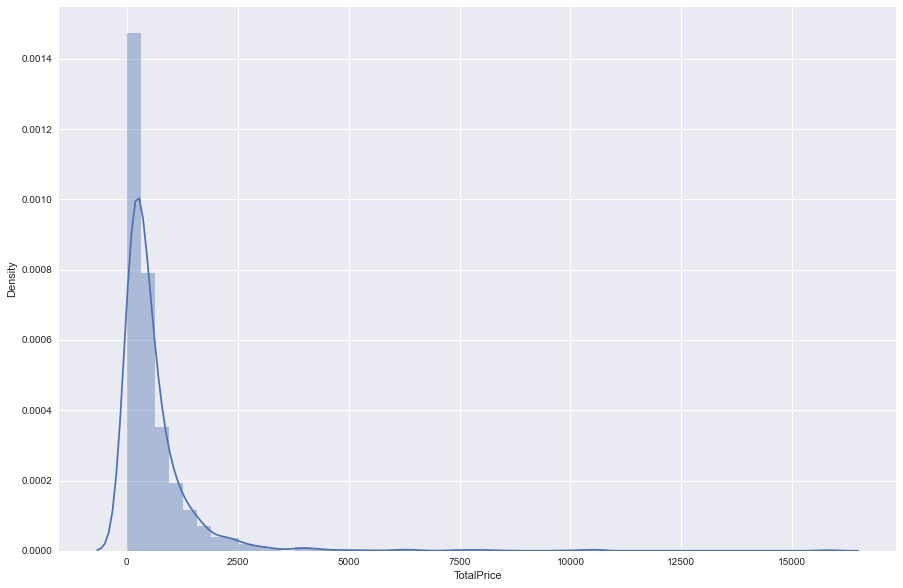

In [138]:
plt.figure(figsize = (15,10))
sns.distplot(tabel1['TotalPrice'])
plt.show()

### Penjelasan
Menguji data yang dianggap memiliki outlier dengan menggunakan IQR. Dengan **syarat** :
- nilai dibawah Q1 - 1,5*IQR
- nilai diatas Q3 + 1,5*IQR

# **Data Visualization & Statistics**

## Negara Pemesan Terbanyak

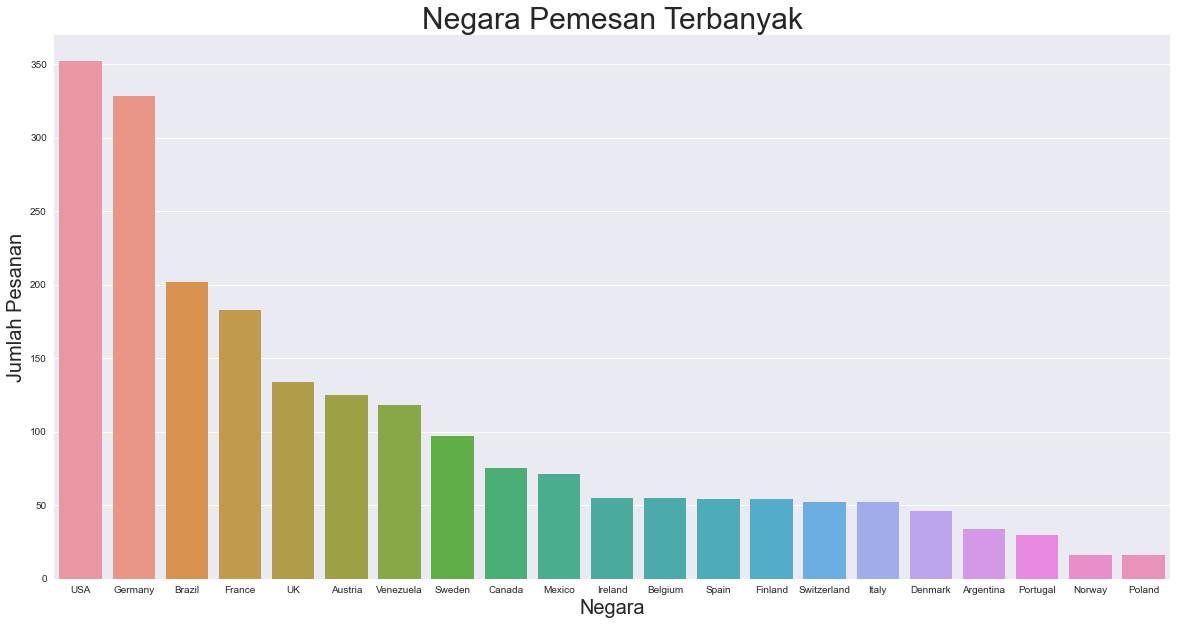

<Figure size 576x396 with 0 Axes>

In [139]:
plt.figure(figsize=(20,10))
sns.countplot(tabel1['Country'],
            order = tabel1['Country'].value_counts().index)
plt.xlabel('Negara', size = 20)
plt.ylabel('Jumlah Pesanan', size = 20)
plt.title ('Negara Pemesan Terbanyak', size = 30)
plt.show()
plt.savefig('Negara.png')

## Kategori Produk Terlaris

In [158]:
productQuanti = tabel1[['Category', 'Product']].groupby(['Category']).count().sort_values('Product', ascending=False)
productQuanti

,Product
Category,
Beverages,403
Dairy Products,365
Confections,334
Seafood,329
Condiments,215
Grains/Cereals,195
Meat/Poultry,173
Produce,135


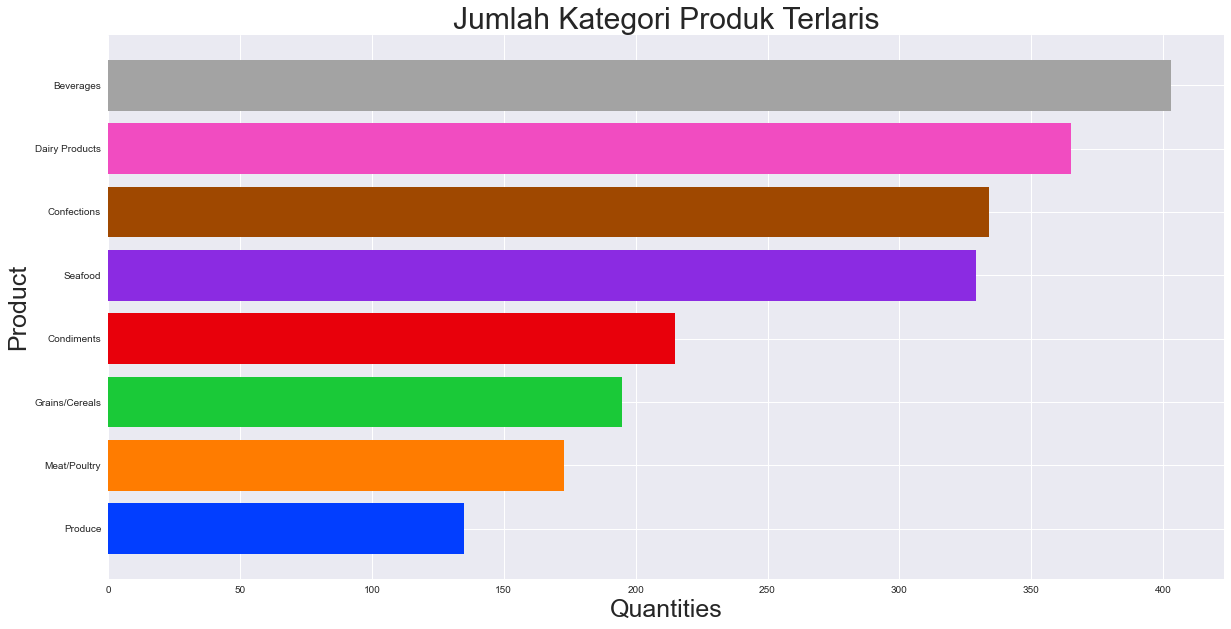

In [141]:
# Product Line Quantities
x = productQuanti.index
y = productQuanti['Product']

plt.style.use('seaborn')
plt.figure(figsize = (20,10))
plt.barh(x,y, color = sns.color_palette('bright'))
plt.title('Jumlah Kategori Produk Terlaris', size = 30)
plt.xlabel('Quantities', size = 25)
plt.ylabel('Product', size = 25)
plt.show()

Pada grafik diatas dapat disimpulkan yang paling signifikan kuantitas terbanyak terdapat 4 produk yaitu : Beverages, Dairy Products, Confections, dan Seafood. Kategori terlaris merupakan beverages (Minuman), hal itu dapat diasumsikan minuman merupakan kebutuhan masyarakat karena manusia lebih sering minum daripada makan, dan juga produk minuman mudah dijangkau masyarakat.


## **Selisih Harga Penawaran dengan Harga Awal Tahun 1996 - 1998**

In [149]:
SelisihHarga = tabel1[['OrderYear', 'DiffPrice']].groupby(['OrderYear']).sum('DiffPrice')
SelisihHarga

,DiffPrice
OrderYear,
1996,1902.07
1997,1820.24
1998,0.00


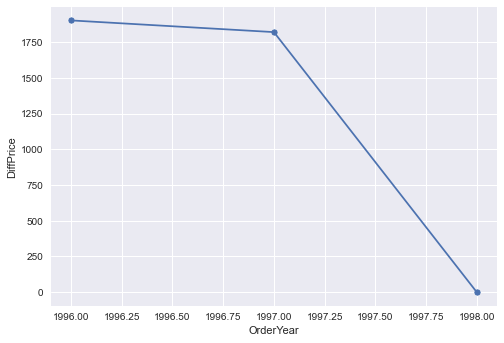

In [150]:
sns.scatterplot(data=SelisihHarga, x='OrderYear', y='DiffPrice')
sns.lineplot(data=SelisihHarga, x='OrderYear', y='DiffPrice')
plt.show()

Mengalami penurunan setiap tahun selisih harga tawar, berarti pelanggan mulai membeli tanpa menawar harga. Terjadi pada tahun 1998 sudah tidak ada selisih harga, jadi semua pelanggan membeli produk tanpa menawar.

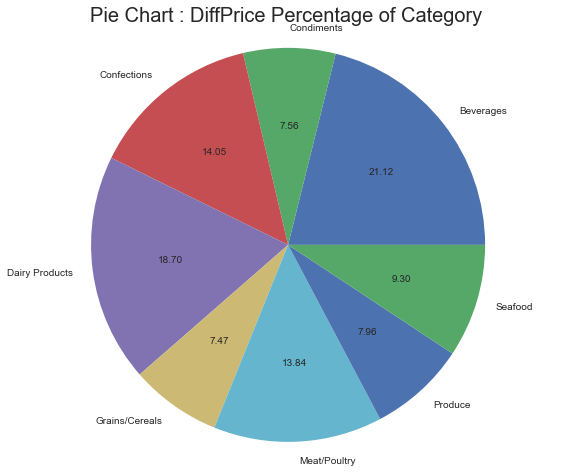

In [185]:
plt.figure(figsize=(10,8))
plt.pie(tabel2['DiffPrice'], labels = tabel2['Category'], autopct='%.2f')
plt.axis('equal')
plt.title('Pie Chart : DiffPrice Percentage of Category', size=20)
plt.show()

# Test Hipotesis

## Test for a Normal Distribution

In [103]:
# Uji Normalitas dengan Shapiro Wilk

from scipy.stats import shapiro

norm, pval = shapiro(tabel1['DiffPrice'])

if pval < 0.05 :
    print (f'Tolak H0 Karena P-Value ({pval} < 5%)')
    print ('DATA TIDAK BERDISTRIBUS NORMAL')
else :
    print (f'Gagal Tolak H0 Karena P-Value ({pval} > 5%)')
    print ('DATA BERDISTRIBUS NORMAL')

Tolak H0 Karena P-Value (0.0 < 5%)
DATA TIDAK BERDISTRIBUS NORMAL


In [105]:
# Uji Perbandingan Nilai DiffPrice Terhadap Kategori Produk
from scipy.stats import kruskal

print ('Hipotesis')
print ('H0 \t: Terdapat Perbedaan Nilai Median Selisih Harga pada Setiap Kategori Produk Yang Ada')
print ('H1 \t: Tidak Terdapat Perbedaan Nilai Median Selisih Harga pada Setiap Kategori Produk Yang Ada')

stat, pvalkruskal = kruskal(
    tabel1[tabel1['Category'] == 'Baverages']['DiffPrice'],
    tabel1[tabel1['Category'] == 'Dairy Products']['DiffPrice'],
    tabel1[tabel1['Category'] == 'Confections']['DiffPrice'],
    tabel1[tabel1['Category'] == 'Meat/Poultry']['DiffPrice'],
    tabel1[tabel1['Category'] == 'Seafood']['DiffPrice'],
    tabel1[tabel1['Category'] == 'Produce']['DiffPrice'],
    tabel1[tabel1['Category'] == 'Condiments']['DiffPrice'],
    tabel1[tabel1['Category'] == 'Grains/Cereals']['DiffPrice']
)

if pvalkruskal < 0.05 :
    print ('Tolak H0')
else :
    print ('Gagal Tolak H0')

Hipotesis
H0 	: Terdapat Perbedaan Nilai Median Selisih Harga pada Setiap Kategori Produk Yang Ada
H1 	: Tidak Terdapat Perbedaan Nilai Median Selisih Harga pada Setiap Kategori Produk Yang Ada
Gagal Tolak H0


## Korelasi Antara Hubungan Harga dan Jumlah Produk

<AxesSubplot:>

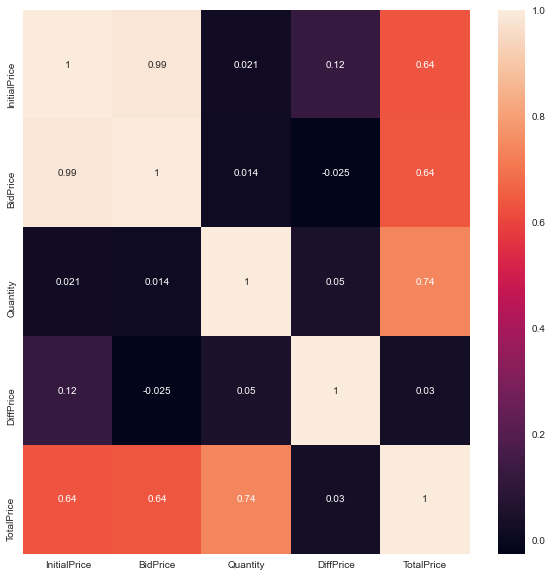

In [107]:
# Korelasi

plt.figure(figsize=(10,10))
sns.heatmap(tabel1[['InitialPrice', 'BidPrice', 'Quantity', 'DiffPrice', 'TotalPrice']].corr('spearman'), annot=True)

<AxesSubplot:xlabel='TotalPrice', ylabel='Quantity'>

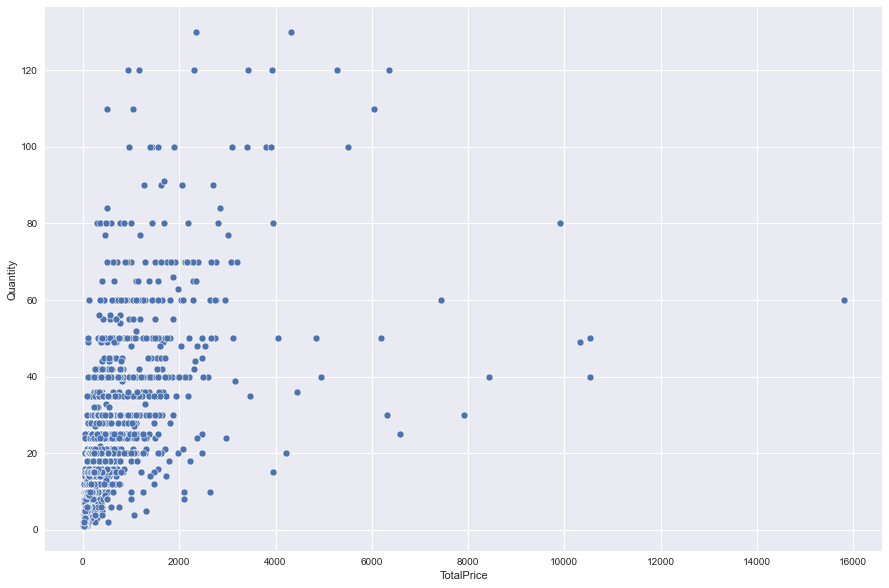

In [513]:
plt.figure(figsize=(15,10))
sns.scatterplot(tabel1['TotalPrice'], tabel1['Quantity'])